In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Binning by Distance

In [2]:
data ={
    "Loanee_names":["Jones","Smith","Lynn","Rebbeca","Vizon","Phylis","Roberto","Sypla","Fernado","Eric","Michale","Fredrick","Allan","Mary","Joseph"],
    "Loan_amount":[10000, 20000,1000,500,700,850,900,1500,12000,16000,1350,16000,8000,7500,850]
    }
df = pd.DataFrame(data = data)
df

,Loanee_names,Loan_amount
0,Jones,10000
1,Smith,20000
2,Lynn,1000
3,Rebbeca,500
4,Vizon,700
5,Phylis,850
6,Roberto,900
7,Sypla,1500
8,Fernado,12000
9,Eric,16000


In [3]:
bins= np.linspace(df["Loan_amount"].min(),df["Loan_amount"].max(),3)
bins

array([  500., 10250., 20000.])

In [4]:
bins = [0,1000,10000,20000]
bins

[0, 1000, 10000, 20000]

In [5]:
labels = ["Group 1","Group 2","Group 3"]
labels

['Group 1', 'Group 2', 'Group 3']

In [6]:
df["Group"] = pd.cut(df["Loan_amount"],bins =bins,labels = labels,include_lowest = True)

In [7]:
df["Group"].value_counts()

Group 1    6
Group 2    5
Group 3    4
Name: Group, dtype: int64

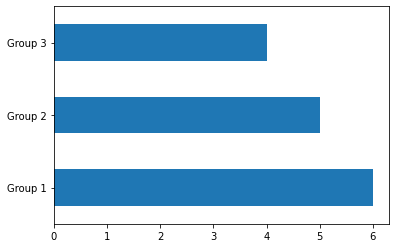

In [8]:
df['Group'].value_counts().plot(kind='barh')
plt.show()

# 2. Binning by Freuency

In [9]:
df['binsqcut'] = pd.qcut(df['Loan_amount'], q=3, precision=1, labels=labels)
df['binsqcut'].value_counts()

Group 1    5
Group 2    5
Group 3    5
Name: binsqcut, dtype: int64

In [10]:
df.head()

,Loanee_names,Loan_amount,Group,binsqcut
0,Jones,10000,Group 2,Group 3
1,Smith,20000,Group 3,Group 3
2,Lynn,1000,Group 1,Group 2
3,Rebbeca,500,Group 1,Group 1
4,Vizon,700,Group 1,Group 1


# 3. Between()

In [11]:
# Loan intervals
Loan_band = [0,1000,10000,20000]

# create age bins
Groups = []
for i in range(3):
    Groups.append([Loan_band[i],Loan_band[i+1]])

# binning the data
for b in Groups:
    df.loc[df['Loan_amount'].between(left=b[0], right=b[1], inclusive='right'), 'band'] = f'({b[0]},{b[1]}]'
df["band"].value_counts()
df.head()

,Loanee_names,Loan_amount,Group,binsqcut,band
0,Jones,10000,Group 2,Group 3,"(1000,10000]"
1,Smith,20000,Group 3,Group 3,"(10000,20000]"
2,Lynn,1000,Group 1,Group 2,"(0,1000]"
3,Rebbeca,500,Group 1,Group 1,"(0,1000]"
4,Vizon,700,Group 1,Group 1,"(0,1000]"


# 4. Sampling

Compute a binned statistic for one or more sets of data.This is a generalization of a histogram function.
A histogram divides the space into bins, and returns the count of the number of points in each bin.
This function allows the computation of the sum, mean, median, or other statistic of the values (or set of values)
within each bin.In this method jenkspy packagefrom scipy.stats is used which has binned_statistic function. The function takes atleast two arguments (input1,input 2) and 3 optional, statistics(mean(default),median,sum,count),bins(default =10) and range.

In [12]:
from scipy.stats import binned_statistic

In [13]:
input1 = np.arange(0,len(df)) #stats is calculated from this values & with evenly spaced values and returns the reference to it
input2 = df["Loan_amount"]

In [14]:
in_bins,bin_edges, misc = binned_statistic(input2,input1, statistic="median", bins=3)
print(in_bins)
print(bin_edges)
print(misc)

[ 5.5 10.   9. ]
[  500.  7000. 13500. 20000.]
[2 3 1 1 1 1 1 1 2 3 1 3 2 2 1]


In [15]:
print(bin_edges[:-1])
print(bin_edges[1:])
print(bin_edges)

[  500.  7000. 13500.]
[ 7000. 13500. 20000.]
[  500.  7000. 13500. 20000.]


In [16]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])
bin_intervals

IntervalIndex([(500.0, 7000.0], (7000.0, 13500.0], (13500.0, 20000.0]], dtype='interval[float64, right]')

In [17]:
def create_median_interval(y,bin_intervals):
    for interval in bin_intervals:
        if y in interval:
            return interval.mid

In [18]:
df["sampled_Loan_amount"] = df["Loan_amount"].apply(lambda y:create_median_interval(y,bin_intervals) )
df["sampled_Loan_amount"].value_counts()

3750.0     7
10250.0    4
16750.0    3
Name: sampled_Loan_amount, dtype: int64

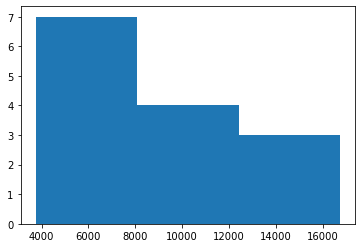

In [19]:
plt.hist(df["sampled_Loan_amount"],bins =3);

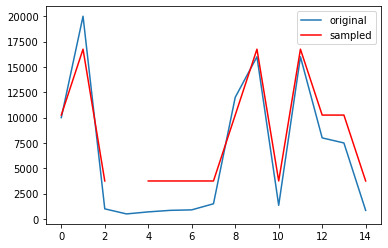

In [20]:
plt.plot(df['Loan_amount'], label='original')
plt.plot(df['sampled_Loan_amount'], color='red', label='sampled')
plt.legend()
plt.show()

In [21]:
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins

array([ 3750., 10250., 16750.])

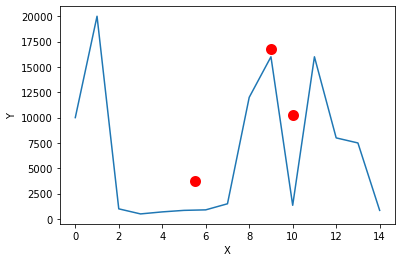

In [22]:
plt.plot(input1,input2)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(in_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

# 5 Natural Breaks

In [23]:
import jenkspy
breaks = jenkspy.jenks_breaks(df['Loan_amount'],3)

In [24]:
df['bin_cut_break'] = pd.cut(df['Loan_amount'] , bins=breaks, labels=labels, include_lowest=True)

In [28]:
df['bin_cut_break'].value_counts()

Group 1    8
Group 2    4
Group 3    3
Name: bin_cut_break, dtype: int64

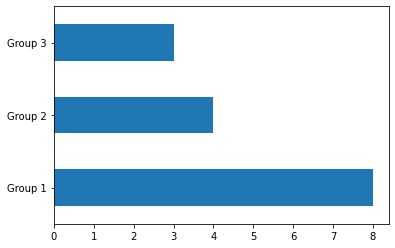

In [25]:
df['bin_cut_break'].value_counts().plot(kind="barh");